In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def cubicspline(xvalues,fvalues,x):
    hvalues = [None] * (len(xvalues) - 1)
    avalues = [None] * (len(hvalues))
    bvalues = [None] * (len(hvalues))
    cvalues = [None] * (len(hvalues))
    dvalues = [None] * (len(hvalues))
    
    
    for j in range(len(xvalues) - 1):
        hvalues[j] = xvalues[j+1] - xvalues[j]

    zvalues = getzvalues(hvalues,fvalues)
    
    for i in range(len(hvalues)):
        avalues[i] = (1 / (6 * hvalues[i])) * (zvalues[i+1] - zvalues[i])
        bvalues[i] = 0.5 * zvalues[i]
        cvalues[i] = (1/hvalues[i])*(fvalues[i+1]-fvalues[i]) - (hvalues[i] / 6) * (zvalues[i + 1] + 2*zvalues[i])
        dvalues[i] = fvalues[i]
    
    w = 0
    while x > xvalues[w]:
        w = w + 1

    
    w = w - 1
        
    s_x = avalues[w]*(x - xvalues[w])**3 + bvalues[w] * (x - xvalues[w])**2 + cvalues[w] * (x - xvalues[w]) + dvalues[w]
    
    return s_x






In [4]:
def getzvalues(hvalues,fvalues):
    a = [None] * (len(hvalues) - 1)
    b = [None] * (len(hvalues) - 2)
    c = [None] * (len(hvalues) - 2)
     
    for i in range(len(a)):
        a[i] = 2 * (hvalues[i] + hvalues[i+1])
    
    for i in range(len(b)):
        b[i] = hvalues[i+1]
        c[i] = hvalues[i+1]

    N = len(a)
    m = [None] * N
    l = [None] * (N - 1)
    y = [None] * (N)
    x = [None] * (N)
    d = [None] * (N)
    
    m[0] = a[0]
    for j in range(N-1):
        l[j] = c[j] / m [j]
        m[j+1] = a[j + 1] - 1 * b[j]
    
    for i in range(N):
        d[i] = (-6 / hvalues[i]) * (fvalues[i+1] - fvalues[i]) + (6/hvalues[i+1]) * (fvalues[i+2] - fvalues[i+1])
    
    y[0] = d[0]
    for i in range(1,N):
        y[i] = d[i] - l[i-1] * y[i - 1]
    
    x[N-1] = y[N-1] / m[N-1]
    for j in range(N-2,-1,-1):
        x[j] = (y[j] - b[j] * x[j+1]) / m[j]

    x.insert(0,0)
    x.append(0)
    
    return x

    
        
    

In [6]:
def plotinterp(xvalues,fvalues):
    number = 50
    plotpoints = []
    inputlist = []
    flist = []
    for i in range(number):
        inpt = -1.091 + i * (1.962 / number)
        inputlist.append(inpt)
        plotpoints.append(cubicspline(xvalues,fvalues,inpt))
  
    for i in range(number):
        f = 4 * inputlist[i] ** 4 - 3 * inputlist[i] ** 2 + inputlist[i]
        flist.append(f)
        

    plt.plot(inputlist,plotpoints, label= "Approx")
    plt.plot(inputlist,flist,label = "Real")
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.2,1)
    plt.legend()

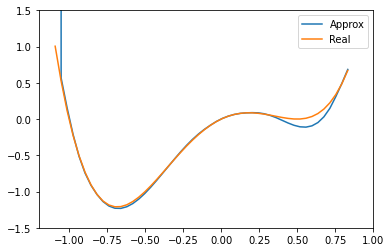

In [7]:
fvalues = [1,-0.4,-1,-0.6,-0.1,0.087,0.06,0.4,0.9]
xvalues = [-1.091,-0.95,-0.829,-0.326,-0.081,0.183,0.306,0.771,0.871]
plotinterp(xvalues,fvalues)

In [20]:
def plottab(t,x,y):
    number = 500
    xlist = []
    ylist = []
    for i in range(number):
        inpt = i * (3.33 / number)
        xlist.append(cubicspline(t,x,inpt))
        
    for i in range(number):
        inpt2 = i * (3.33 / number)
        ylist.append(cubicspline(t,y,inpt2))
    
        
    plt.plot(xlist,ylist, label = "Para Curve")
    plt.ylim(min(y) - 0.1,max(y)+0.1)
    plt.xlim(min(x)-0.1,max(x)+0.1)


In [ ]:
t = [0,0.618,0.935,1.255,1.636,1.905,2.317,2.827,3.330]
x = [1.50,0.9,0.6,0.35,0.20,0.1,0.5,1.0,1.5]
y = [0.75,0.9,1,0.8,0.45,0.2,0.1,0.2,0.25]

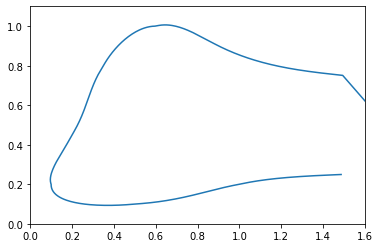

In [21]:
plottab(t,x,y)